#Problem Statetement:
With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy

In [ ]:
#import labreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Dataset:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df1= df.copy()

#Project Steps and Objectives:
##1) Exploratory Data Analysis (EDA):

In [ ]:
#information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
# we have change Transaction_DateTime column datatype object into datatype datetime64[ns]
df1["Transaction_DateTime"]=pd.to_datetime(df1["Transaction_DateTime"])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Transaction_ID             5000 non-null   object        
 1   Card_Type                  4983 non-null   object        
 2   Merchant_Category          4978 non-null   object        
 3   Transaction_Amount         4994 non-null   float64       
 4   Transaction_DateTime       5000 non-null   datetime64[ns]
 5   Location                   5000 non-null   object        
 6   Region                     5000 non-null   object        
 7   Cardholder_Age             4865 non-null   float64       
 8   Cardholder_Gender          4911 non-null   object        
 9   Cardholder_Monthly_Income  4686 non-null   float64       
 10  Cardholder_Average_Spend   4792 non-null   float64       
 11  Credit_Limit               4991 non-null   float64       
 12  Device

In [ ]:
# only object datatype columns have store categorical columns Variable
categorical_cols = df1.select_dtypes(include=['object']).columns.drop('Transaction_ID')

###a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category, Location, etc.

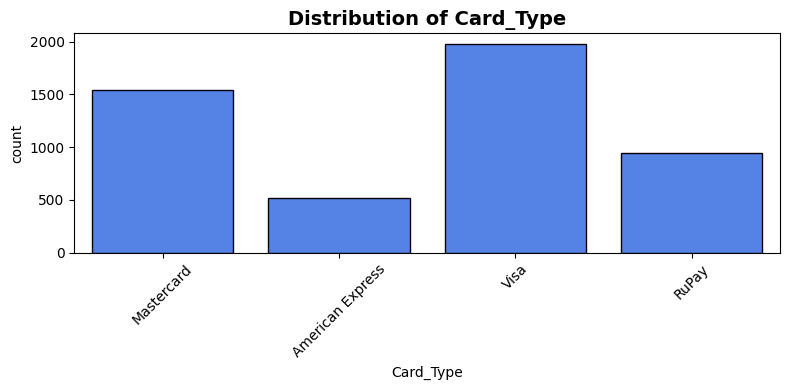

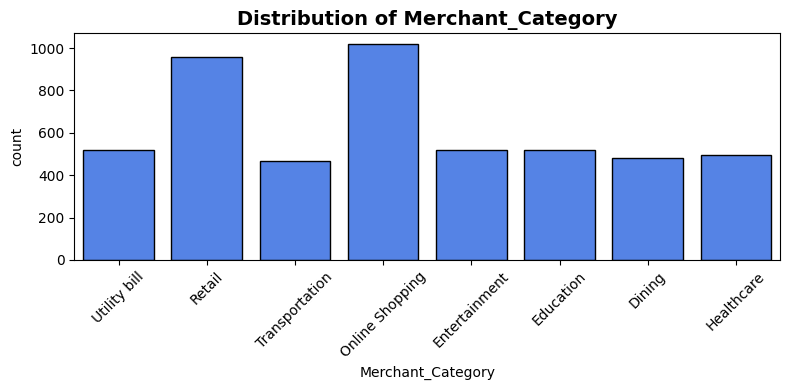

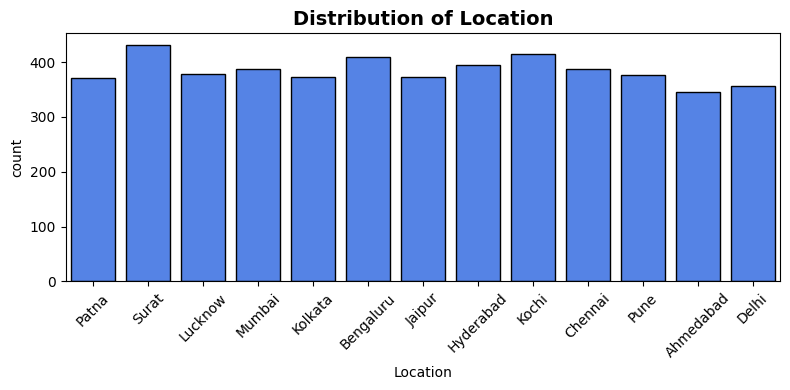

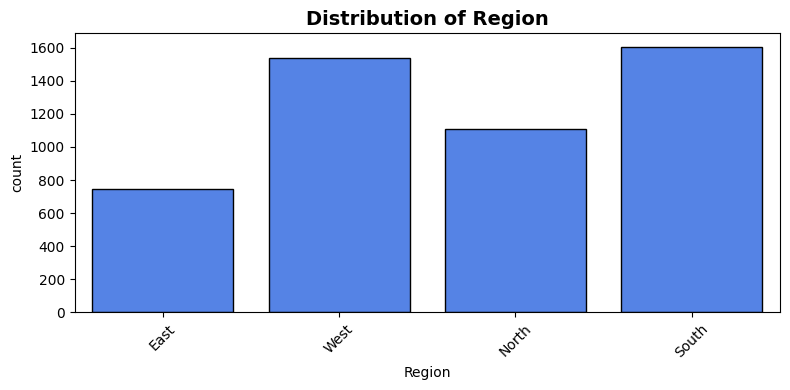

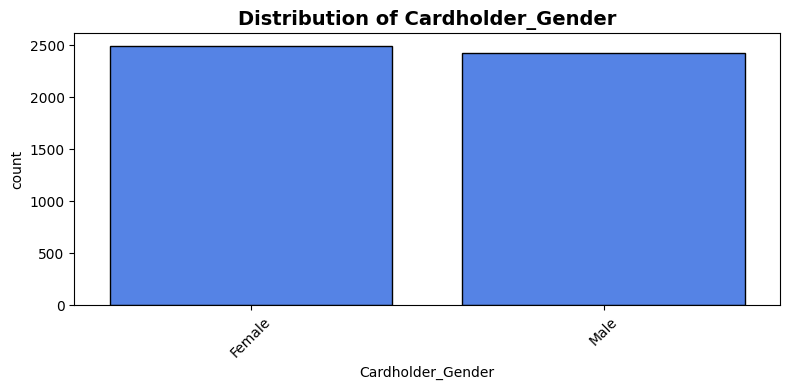

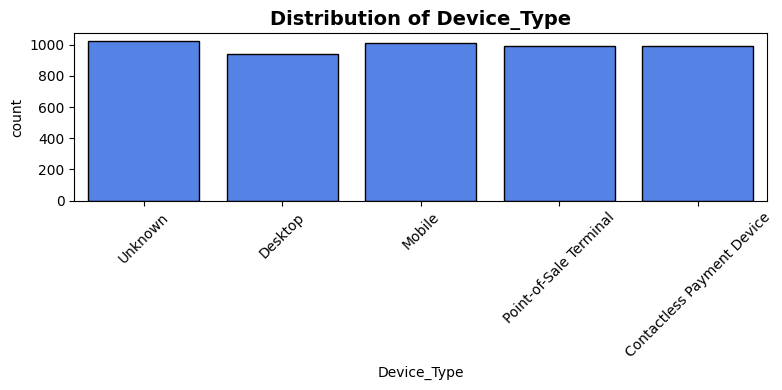

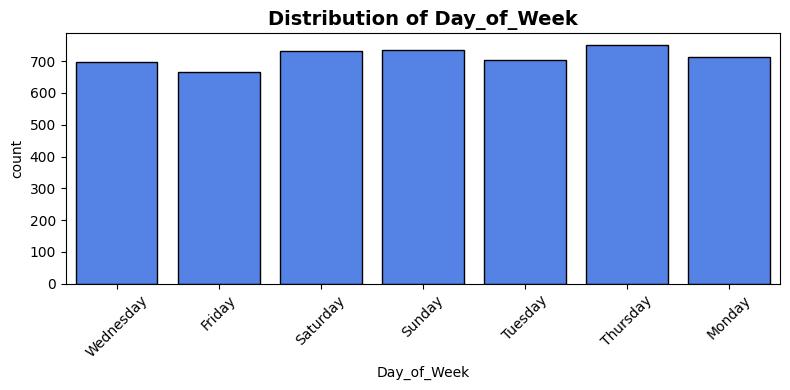

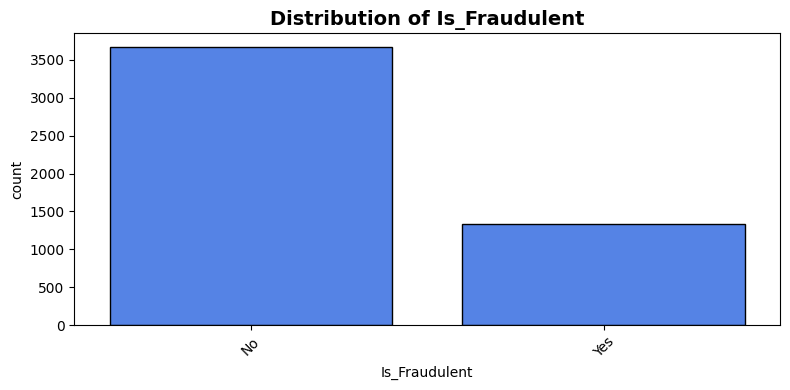

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, color="#3d7afd", edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###b) Explore numerical features like Transaction_Amount, Cardholder_Age, Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics to understand their central tendency and spread.

In [ ]:
#summary of descriptive statistics
df1.describe()

,Transaction_Amount,Transaction_DateTime,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,5000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,2022-01-05 20:38:04.751000064,49.106680,137353.817542,63058.343566,124654.377880
min,25008.000000,2020-01-01 09:43:17,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,2021-01-06 02:38:58.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,2022-01-06 22:41:33,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,2023-01-05 09:01:57.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,2023-12-30 11:41:36,80.000000,299907.000000,199898.290000,200000.000000
std,43089.045623,NaN,18.398524,69471.623020,40056.989704,55668.246494


#Observation:
*****
In the dataset we have
- Maximum Card holder Age is 80 years
- Minimum Card holder Age  is 18 years
- Maximum Card holder Monthly Income is ***2,99,907***
- Minimum Card holder Monthly Income is ***35,005***
- Average Card holder Monthly Income is ***1,37,353***
- Maximum Card holder Average Spend is ***1,99,898***
- Minimum Card holder Average Spend is ***10,282***
- 50% of  Card holder Average Spend is ***49,547***
- Maximum Credit Limit is ***2,00,000***
- Maximum  Credit Limit is ***50,000***


In [ ]:
numerical_cols = df1.select_dtypes(include=['float64']).columns

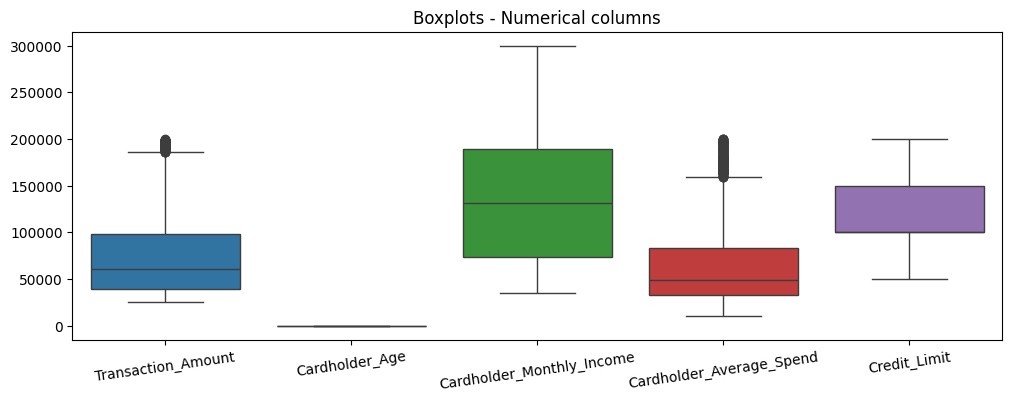

In [ ]:
#Boxplot of Numerical columns
plt.figure(figsize=(12, 4))
sns.boxplot(data=df1[numerical_cols])
plt.title('Boxplots - Numerical columns')
plt.xticks(rotation=8)
plt.show()

###c) Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).

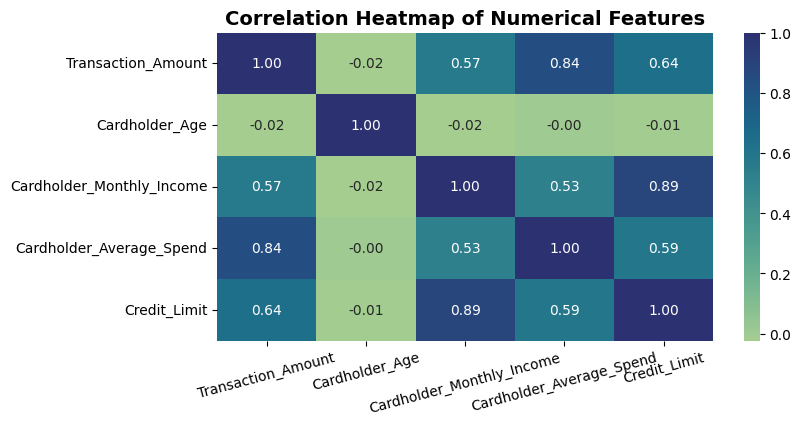

In [ ]:
#Correlation Heatmap of Numerical Features
corr_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=15)
plt.show()

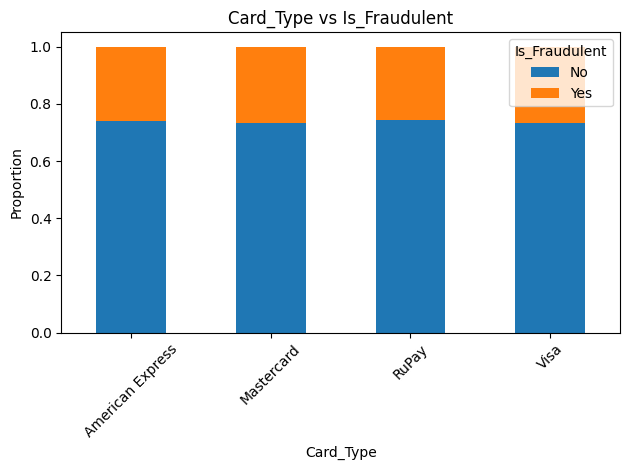

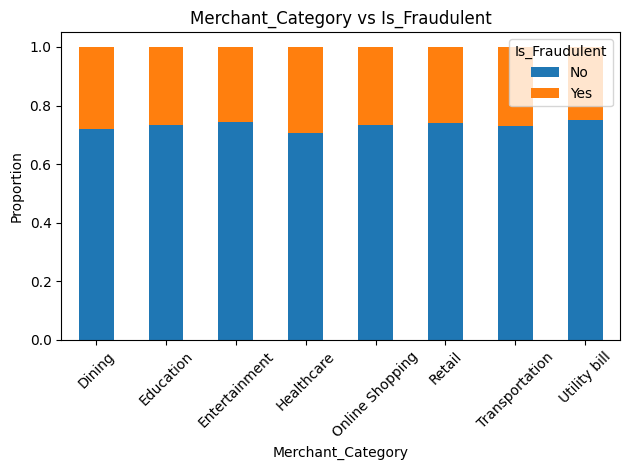

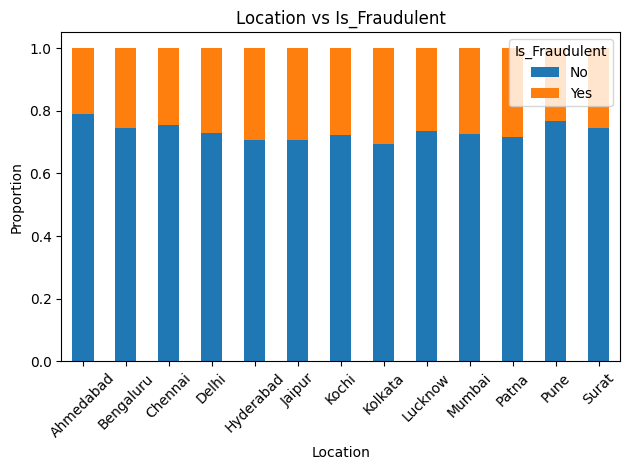

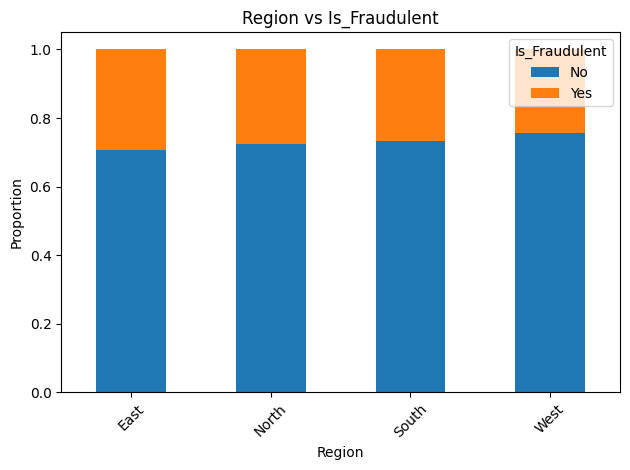

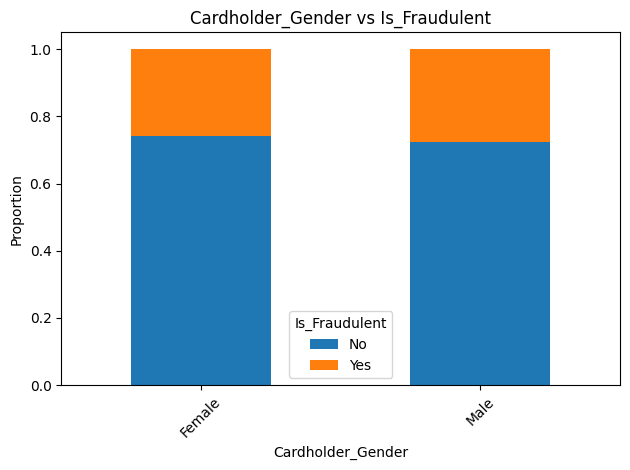

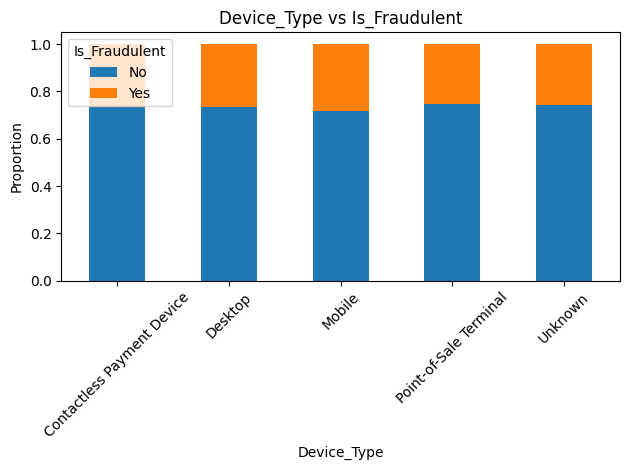

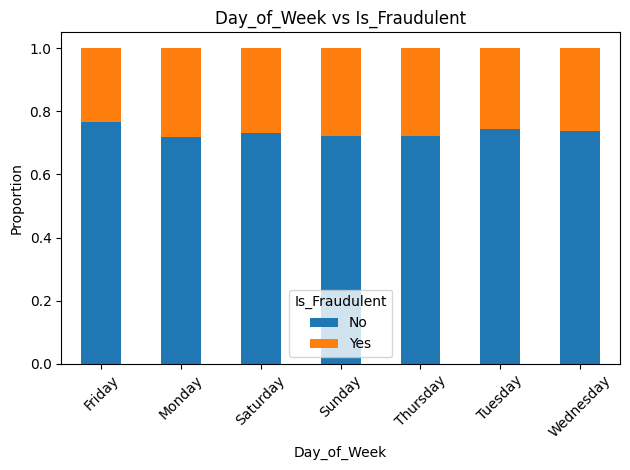

In [ ]:
#Categorical vs Target:
for col in categorical_cols[:-1]:
    fraud_rate = pd.crosstab(df1[col], df1['Is_Fraudulent'], normalize='index')
    fraud_rate.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

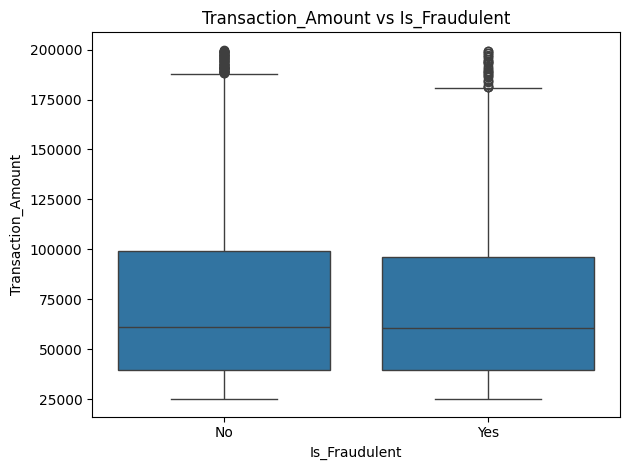

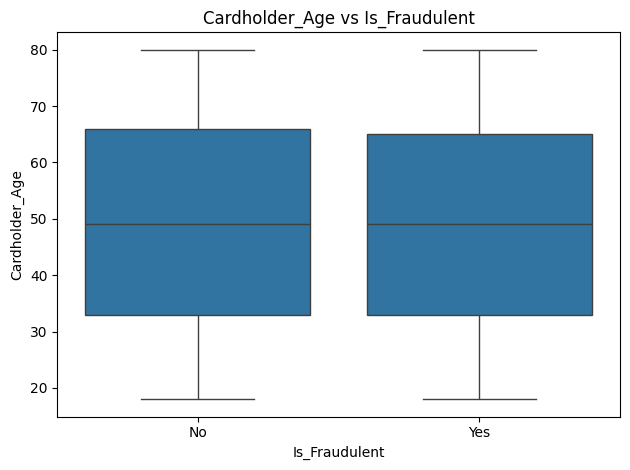

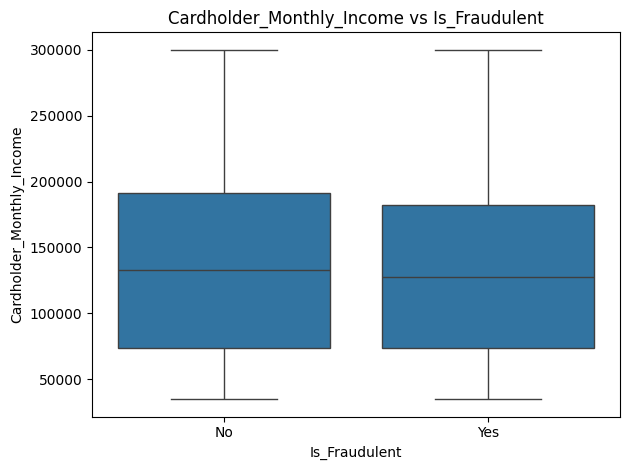

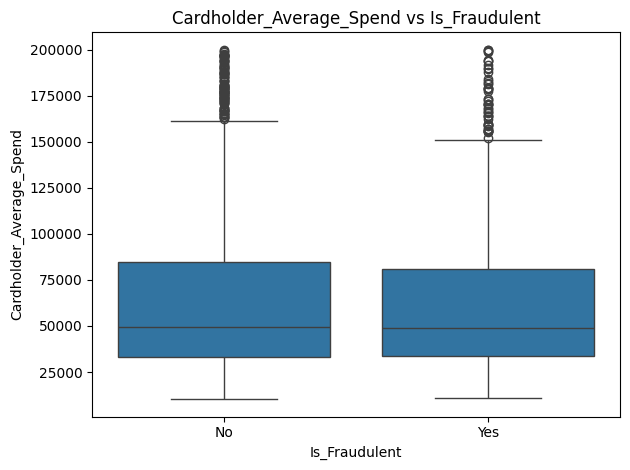

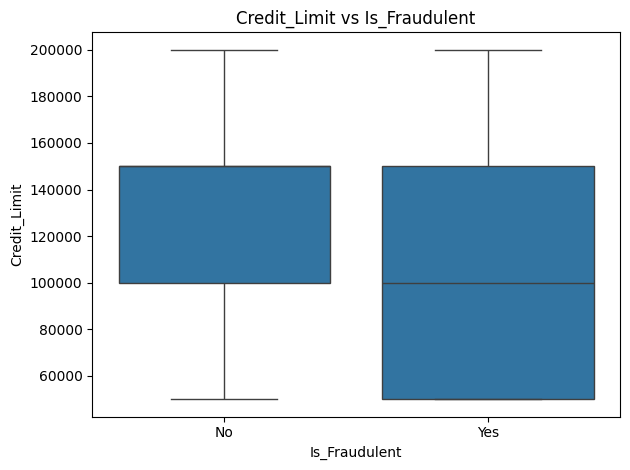

In [ ]:
#Numerical vs Target (Boxplots):
for col in numerical_cols:
    sns.boxplot(data=df1, x='Is_Fraudulent', y=col)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.tight_layout()
    plt.show()

###d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.

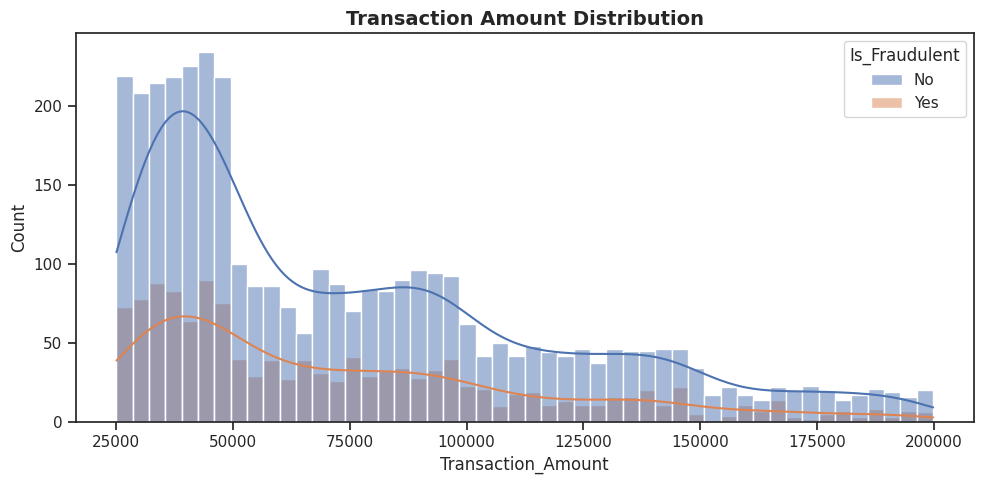

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', kde=True, bins=50)
plt.title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

###e) Investigate whether certain features are more susceptible to fraud.

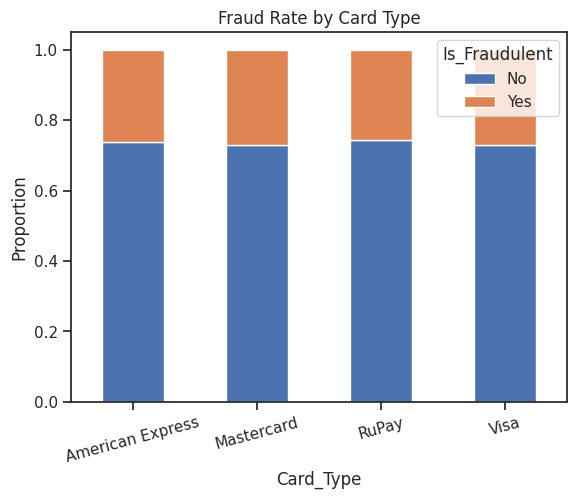

In [ ]:
fraud_rate = df.groupby('Card_Type')['Is_Fraudulent'].value_counts(normalize=True).unstack().fillna(0)
fraud_rate.plot(kind='bar', stacked=True)
plt.title("Fraud Rate by Card Type")
plt.ylabel("Proportion")
plt.xticks(rotation=15)
plt.show()


#2) Data Preprocessing - Data Cleaning:
###a) Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.

In [ ]:
df1.isna().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
#mean imputation for numerical features
for col in numerical_cols:
    df1[col]=df1[col].fillna(df1[col].mean())

In [ ]:
#mode imputation for categorical features
for col in df1.select_dtypes(include=['object']).columns:
    df1[col]=df1[col].fillna(df1[col].mode()[0])

In [ ]:
df1.isna().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


###b) Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.

In [ ]:
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
print(f"Remaining rows after outlier removal: {df1.shape[0]}")

Remaining rows after outlier removal: 4746


###c) Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.

In [ ]:
#numerical features by calculating the skewness score

print(df1['Transaction_Amount'].skew())

print(df1['Cardholder_Age'].skew())

print(df1['Cardholder_Monthly_Income'].skew())

print(df1['Cardholder_Average_Spend'].skew())

print(df1['Credit_Limit'].skew())

0.9343163226542156
-0.0106893400249129
0.4948589278186003
0.8996510282876518
0.091206794461929


In [ ]:
for col in df1.select_dtypes(include=['float64']).columns:
    if (df1[col] <= 0).any():
        df1[col] = np.sqrt(df1[col] - df1[col].min() + 1)
    else:
        df1[col] = np.log1p(df1[col])

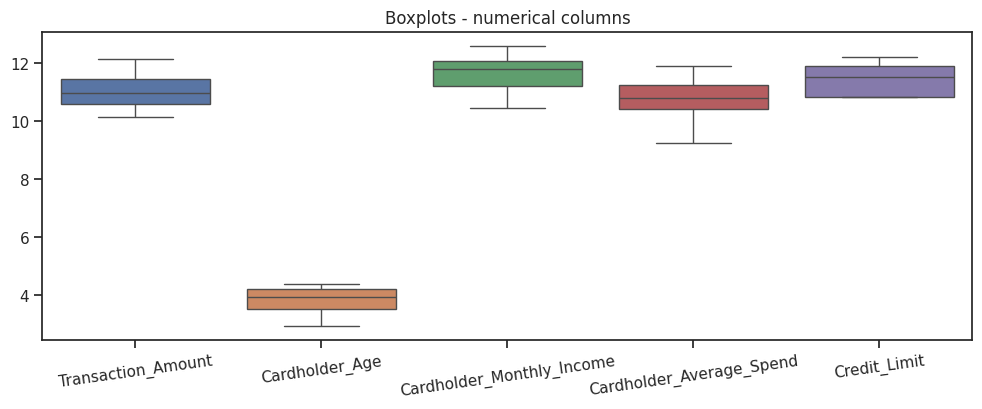

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df1[numerical_cols])
plt.title('Boxplots - numerical columns')
plt.xticks(rotation=8)
plt.show()

#3) Feature Engineering:
###a) Identify the categorical features in the dataset.

In [ ]:
print("categorical features in the dataset :\n ")
categorical_cols

categorical features in the dataset :
 


Index(['Card_Type', 'Merchant_Category', 'Location', 'Region',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

###b) Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.

In [ ]:
df1["Card_Type"].unique()

array(['Mastercard', 'American Express', 'RuPay', 'Visa'], dtype=object)

In [ ]:
df1["Merchant_Category"].unique()

array(['Utility bill', 'Retail', 'Entertainment', 'Online Shopping',
       'Education', 'Dining', 'Transportation', 'Healthcare'],
      dtype=object)

In [ ]:
df1["Location"].unique()

array(['Patna', 'Surat', 'Lucknow', 'Mumbai', 'Kolkata', 'Bengaluru',
       'Jaipur', 'Hyderabad', 'Kochi', 'Chennai', 'Pune', 'Ahmedabad',
       'Delhi'], dtype=object)

In [ ]:
df1["Region"].unique()

array(['East', 'West', 'North', 'South'], dtype=object)

In [ ]:
df1["Cardholder_Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df1["Device_Type"].unique()

array(['Unknown', 'Desktop', 'Mobile', 'Point-of-Sale Terminal',
       'Contactless Payment Device'], dtype=object)

In [ ]:
df1["Day_of_Week"].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Tuesday', 'Thursday',
       'Monday'], dtype=object)

In [ ]:
df1["Is_Fraudulent"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [ ]:
le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns.drop('Transaction_ID'):
    df1[col] = le.fit_transform(df1[col])

In [ ]:
df1.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,1,7,10.211524,2020-01-01 09:43:17,10,0,3.178054,0,11.457762,10.501517,11.512935,4,6,0
1,V606KV56,0,5,11.338060,2020-01-03 16:26:13,12,3,3.912023,1,11.905771,11.398413,11.918397,1,0,0
4,K256ZN73,2,5,11.304313,2020-01-04 17:26:47,8,1,3.637586,0,12.069514,10.872638,12.206078,2,2,0
5,I812SG19,2,2,11.789943,2020-01-04 19:55:12,9,3,4.394449,1,12.023783,11.294700,11.918397,3,2,0
6,Y182UO40,3,5,11.842495,2020-01-05 16:33:10,12,3,3.526361,1,12.055203,11.341149,11.918397,1,3,1


#4) Feature Selection:
###a) Select relevant features that have the most impact on predicting fraudulent transactions.

In [ ]:
X = df1.drop(['Is_Fraudulent', 'Transaction_ID', 'Transaction_DateTime'], axis=1) #X is feature
y = df1['Is_Fraudulent'] # y is Target

###b) Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.

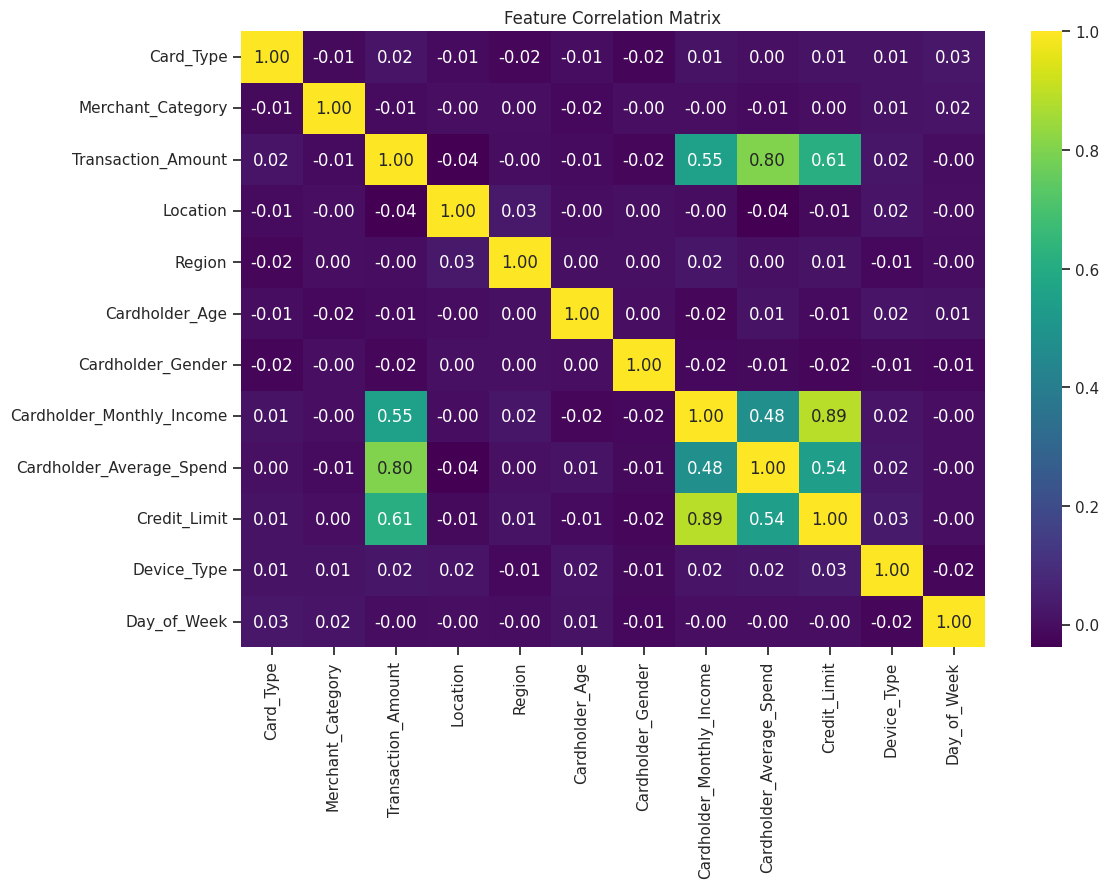

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Feature Correlation Matrix")
plt.show()

***Observation***
---
- Strongest relationship: Monthly_Income, Average_Spend, and Credit_Limit are highly correlated
- Transaction Amount is also strongly linked to Credit Limit.

- Categorical/behavioral features (like day, device, region, gender) show almost no linear correlation with numerical features.

- No meaningful negative correlation exists.

#5) Split data into training and testing:
###a) Divide the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###b) Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.

In [ ]:
print(f" Orginal Dataset: {df1.shape} ")
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 Orginal Dataset: (4746, 15) 
 X_train.shape : (3796, 12) 
 X_test.shape : (950, 12) 
 y_train.shape : (3796,) 
 y_test.shape : (950,) 


In [ ]:
print("Train fraud ratio:", y_train.mean())
print("Test fraud ratio:", y_test.mean())

Train fraud ratio: 0.267913593256059
Test fraud ratio: 0.25894736842105265


#6) Feature Scaling:
###a) Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.
###b) Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization).

In [ ]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

#7) Build the Machine Learning Model:
###a) Import the necessary modules and libraries for building and evaluating machine learning models.

In [ ]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# import Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

###b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.

In [ ]:
models = { "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC() }

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df

,Model,Accuracy,F1 Score
4,K-Nearest Neighbors,0.680000,0.642817
3,Random Forest,0.740000,0.637906
1,Naive Bayes,0.741053,0.630836
0,Logistic Regression,0.741053,0.630836
5,SVM,0.741053,0.630836
2,Decision Tree,0.613684,0.619533


***Observation***
---
- Random Forest, Naive Bayes, Logistic Regression, and SVM all achieved the highest accuracy of *0.74*, showing they are reliable classifiers for this dataset.

- K-Nearest Neighbors (KNN) performed slightly lower with an accuracy of (0.68), but its F1 Score (0.64) is slightly better than Logistic, SVM, and Naive Bayes, meaning it balances precision and recall better.

- Decision Tree gave the lowest accuracy (0.61), but its F1 Score (0.61) is still reasonable compared to other models, indicating it predicts positive classes moderately well despite lower accuracy.


###c) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.


In [ ]:
best_model = KNeighborsClassifier()
best_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

###d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.

In [ ]:
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"\n Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

Confusion Matrix:
 [[610  94]
 [210  36]]

 Accuracy: 0.6800
 Precision: 0.2769
 Recall: 0.1463
 F1 Score: 0.1915


###e) Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

In [ ]:
print("\nClassification Report:")
print("-"*35)
print(classification_report(y_test, y_pred))

if recall > 0.7 and f1 > 0.65:
    print("The model is performing well in finding fraud cases.")
elif recall > 0.5:
    print("The model is okay. You might need to improve it or try another one.")
else:
    print("The model is not good at finding fraud. It needs to be improved.")


Classification Report:
-----------------------------------
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       704
           1       0.28      0.15      0.19       246

    accuracy                           0.68       950
   macro avg       0.51      0.51      0.50       950
weighted avg       0.62      0.68      0.64       950

The model is not good at finding fraud. It needs to be improved.
